# Partial differential equations

This notebook contains the required figures and analysis for SH Modelling and Visualisation CP3. 

In [68]:
import math
import random
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import pandas as pd

## The Cahn-Hilliard equation 

The Euler algorithm for the Cahn-Hilliard equation was implemented on a 50x50 2D lattice using dx=dt=1. The remaining parameters were set to a=M=$\kappa$=0.1. 

### Spinodal decomposition

A plot of free energy vs time for $\phi_\circ=0.0 \pm 0.1$ (spinodal decomposition) is shown below. 

In [273]:
df=pd.read_excel("spinodal_50.xlsx")

In [275]:
df
df_short=df.drop(columns='Unnamed: 0')
df_short.head()

,Number of updates,Free energy
0,0,-0.281960
1,10,-0.125001
2,20,-0.105454
3,30,-0.099303
4,40,-0.096827


<AxesSubplot: title={'center': 'Spinodal decomposition'}, xlabel='Number of updates', ylabel='Free energy'>

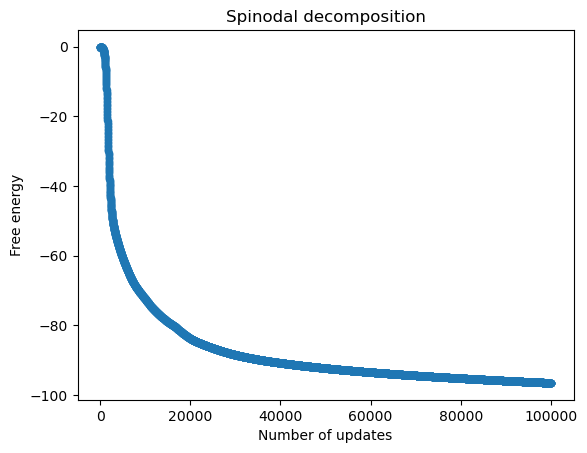

In [277]:
df_short.plot(x='Number of updates', y='Free energy', title='Spinodal decomposition', kind='scatter', ylabel='Free energy', legend=False)

### Droplet growth

A plot of free energy vs time for $\phi_\circ=0.5 \pm 0.1$ (Ostwald ripening) is shown below. A 50x50 lattice was used. 

In [267]:
df=pd.read_excel("ostwald_50.xlsx")

In [271]:
df
df_short=df.drop(columns='Unnamed: 0')
df_short.head()
#df_short

,Number of updates,Free energy
0,0,-54.523399
1,10,-54.669979
2,20,-54.686691
3,30,-54.692798
4,40,-54.695791


<AxesSubplot: title={'center': 'Ostwald ripening'}, xlabel='Number of updates', ylabel='Free energy'>

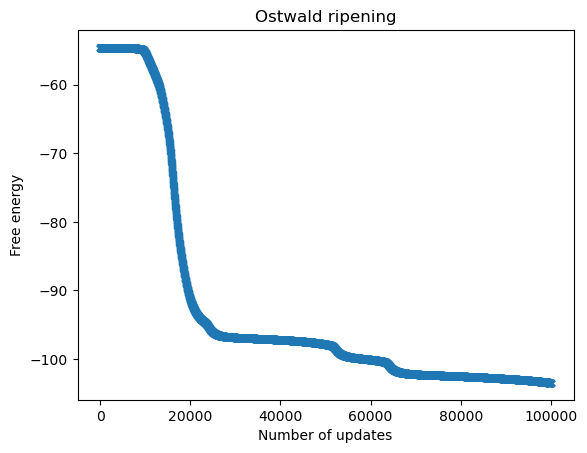

In [272]:
df_short.plot(x='Number of updates', y='Free energy', title='Ostwald ripening', ylabel='Free energy', kind='scatter', marker='x', legend=False)

The stepwise decrease in free energy due to dissapearance of smaller spots is shown below:

## Poisson's equation 

### Monopole potential field
The Jacobi and Gauss-Seidel algorithms were implemented for a monopole charge distribution on a 100x100x100 3D lattice. A cut through the midplane of the potential field is shown below: 

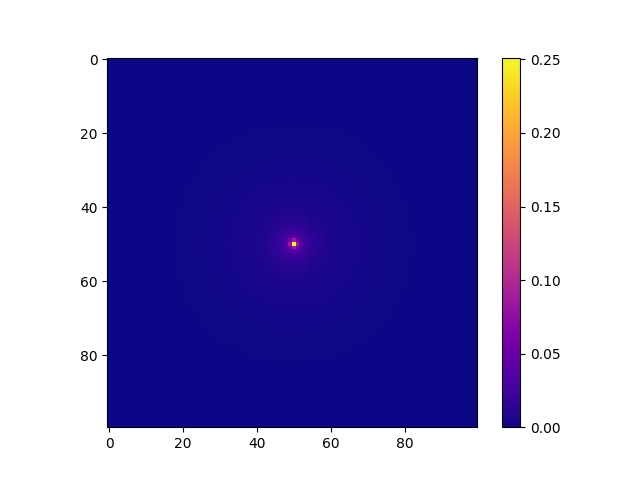

A full simulation of the 3D cubic system was carried out using both the Jacobi and Gauss-Seidel algorithms.  

In [279]:
df=pd.read_excel("electric.xlsx")

In [281]:
df.head()

,Unnamed: 0,x,y,z,r,pot,Ex,Ey,Ez,|E|
0,0,50,50,50,86.602540,0.0,0.0,0.0,0.0,0.0
1,1,50,50,49,86.029065,0.0,0.0,0.0,0.0,0.0
2,2,50,50,48,85.463442,0.0,0.0,0.0,0.0,0.0
3,3,50,50,47,84.905830,0.0,0.0,0.0,0.0,0.0
4,4,50,50,46,84.356387,0.0,0.0,0.0,0.0,0.0


The potential field was plotted as a function of the radial distance to the point charge. 

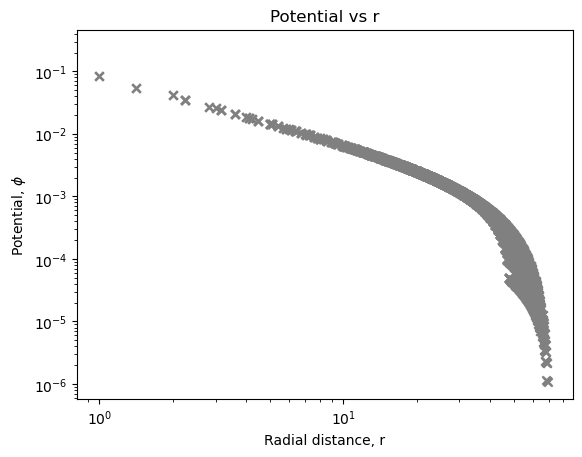

In [282]:
r=df.iloc[500000:510000, 4].to_numpy()
pot=df.iloc[500000:510000, 5].to_numpy()

ax=plt.gca() 
ax.scatter(r,pot ,c="grey", marker='x')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Radial distance, r')
ax.set_ylabel('Potential, $\phi$')
ax.set_title('Potential vs r')
plt.show()

Applying a linear fit in the region 0.5<r<5 yields a straight line gradient of **-1.0785**, as shown below. This provides evidence for the expected 1/r behaviour of the electric potential. 

In [235]:
r_lin=[]
pot_lin=[]
for n in range(len(r)):
    
    if r[n]>=0.5 and r[n]<5:
        r_lin.append(r[n])
        pot_lin.append(pot[n])
        
m=scipy.stats.linregress(np.log10(r_lin), np.log10(pot_lin))[0]
c=scipy.stats.linregress(np.log10(r_lin), np.log10(pot_lin))[1]

print(m)

-1.0784855668778683


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>Fitting of potential field data</b></p>

<p style='margin-top:1em; text-align:center'>
Gradient of potential field log-log plot = <b>-1.0785<b></p>
    
</p>
</p></span>
</div>

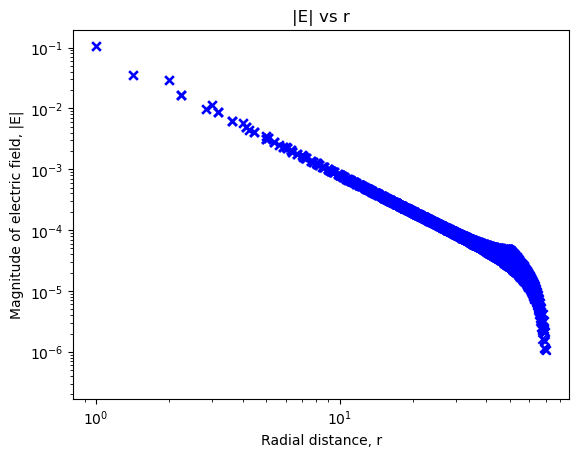

In [284]:
r=df.iloc[500000:510000, 4].to_numpy()
E=df.iloc[500000:510000, 9].to_numpy()

ax=plt.gca() 
ax.scatter(r,E ,c="blue", marker='x')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Radial distance, r')
ax.set_ylabel('Magnitude of electric field, |E|')
ax.set_title('|E| vs r')
plt.show()

We can again compute the gradient of the linear section of the graph. The gradient in the region 2<r<15 has a value of -2.0507. This shows the expected $1/r^2$ behaviour of the electric field from a point charge.

In [285]:
r_lin=[]
E_lin=[]
for n in range(len(r)):
    
    if r[n]>=2 and r[n]<15:
        r_lin.append(r[n])
        E_lin.append(E[n])
        
m=scipy.stats.linregress(np.log10(r_lin), np.log10(E_lin))[0]
c=scipy.stats.linregress(np.log10(r_lin), np.log10(E_lin))[1]

print(m)

-2.050701374342342


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>Fitting of electric field data</b></p>

<p style='margin-top:1em; text-align:center'>
Gradient of electric field log-log plot = <b>-2.0507<b></p>
    
</p>
</p></span>
</div>

We can also plot the electric field vector in the midplane of the simulation lattice:

In [213]:
E_field=df.iloc[500000:510000, 7:9].to_numpy()
coord=df.iloc[500000:510000, 2:4].to_numpy()

In [214]:
coord[5050]
E_field[5050]=[0,0] #set E field at origin to zero - no physical solution here

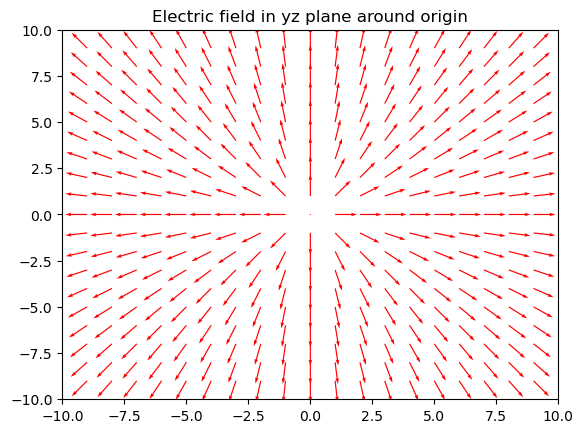

In [215]:
Y = coord[:,0]
Z = coord[:,1]
  
E_y = E_field[:, 0]
E_z = E_field[:, 1]

plt.quiver(Y, Z, E_y, E_z, color='r', units='xy', scale=1)
plt.title('Electric field in yz plane around origin')
  
# x-lim and y-lim
plt.xlim(-10, 10)
plt.ylim(-10, 10)
  
plt.show()

### Successive over-relaxation
The SOR algorithm was applied to the electric point charge problem on a 3D 50x50x50 lattice. An error of <0.01 was taken as acceptable convergence. 

In [3]:
df_SOR=pd.read_excel('SOR_data.xlsx')

In [16]:
df_SOR.head()

,Unnamed: 0,omega,Updates to convergence
0,0,1.00,1030
1,1,1.01,1015
2,2,1.02,999
3,3,1.03,984
4,4,1.04,969


<AxesSubplot: title={'center': 'Optimisation of $\\omega$'}, xlabel='omega', ylabel='Updates to convergence'>

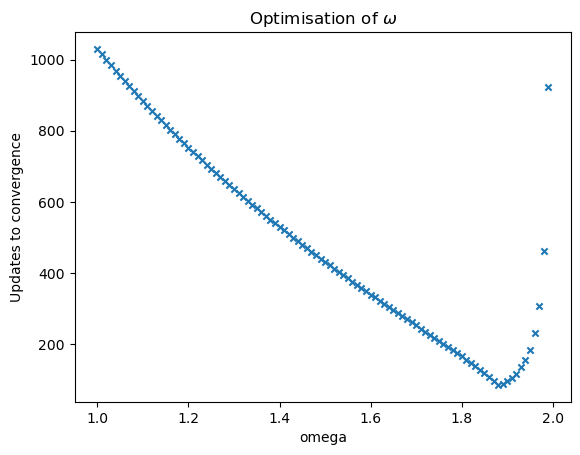

In [7]:
df_SOR.plot(x='omega', y='Updates to convergence', title='Optimisation of $\omega$', kind='scatter', marker='x')

<AxesSubplot: title={'center': 'Visualisation of minimum $\\omega$'}, xlabel='omega', ylabel='Updates to convergence'>

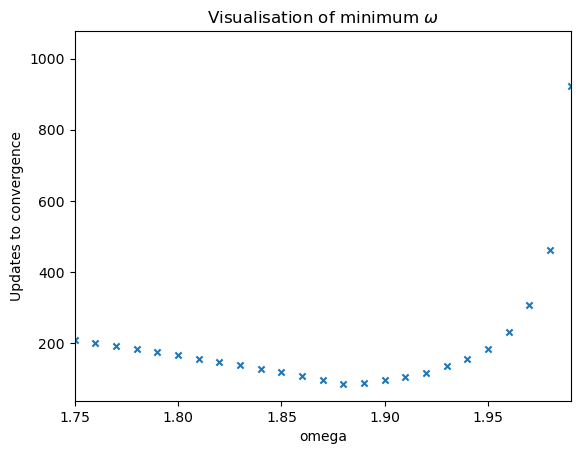

In [13]:
df_SOR.plot(x='omega', y='Updates to convergence', title='Visualisation of minimum $\omega$', kind='scatter', marker='x', xlim=(1.75, 1.99))

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>Optimisation of $\omega$</b></p>
<p style='margin-left:1em;'>
From the above figure, we can estimate the value of $\omega$ that results in the minimum number of iterations required for convergence. Only 86 iterations were required at $\omega _{min}$, compared to 1030 for the standard Gauss-Seidel algorithm ($\omega$=1). 

$$\omega _{min} = 1.88$$
    
</p>
</p></span>
</div>

### Magnetic field for a straight wire

Calculations of the magnetic and field and potential for a straight wire aligned with the x-axis were carried out on a 3D 100x100x100 lattice using the Jacobi and Gauss-Seidel algorithms.

A cut of the potential field in the yz plane (perpendicular to the wire) is shown below. The potential field points parallel to the wire ($\vec{A}=A_x(y,z)\vec{e_x}$). 

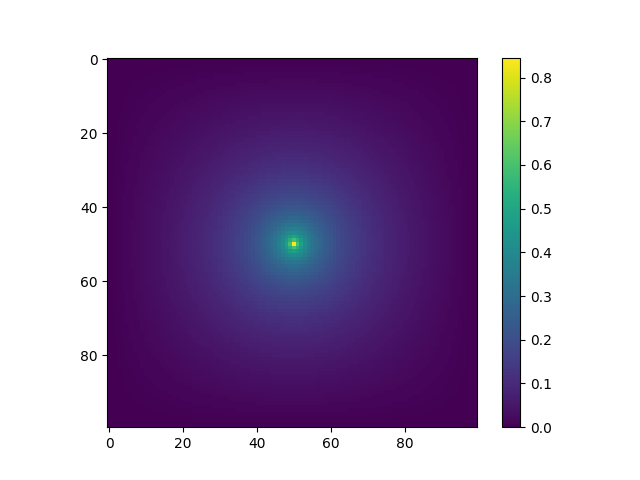

In [217]:
df_mag=pd.read_excel('magnetic.xlsx')

In [247]:
df_mag.head()

,Unnamed: 0,x,y,z,r,pot,Bx,By,Bz,|B|
0,0,50,50,50,86.602540,0.0,0,0.0,0.0,0.0
1,1,50,50,49,86.029065,0.0,0,0.0,0.0,0.0
2,2,50,50,48,85.463442,0.0,0,0.0,0.0,0.0
3,3,50,50,47,84.905830,0.0,0,0.0,0.0,0.0
4,4,50,50,46,84.356387,0.0,0,0.0,0.0,0.0


Plots of magnetic potential and magnetic field vs radial distance r are shown below:

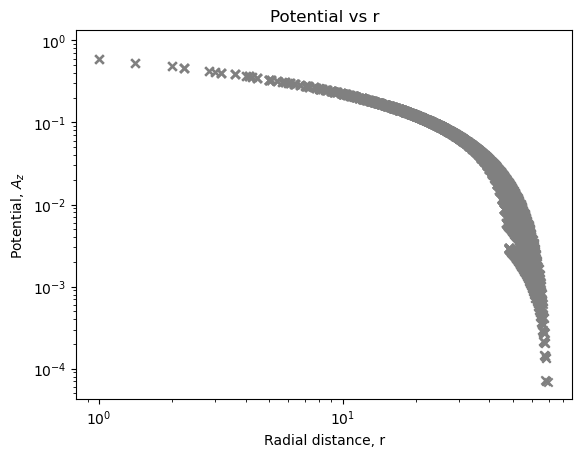

In [288]:
r=df_mag.iloc[500000:510000, 4].to_numpy()
pot=df_mag.iloc[500000:510000, 5].to_numpy()

ax=plt.gca() 
ax.scatter(r,pot ,c="grey", marker='x')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Radial distance, r')
ax.set_ylabel('Potential, $A_z$')
ax.set_title('Potential vs r')
plt.show()

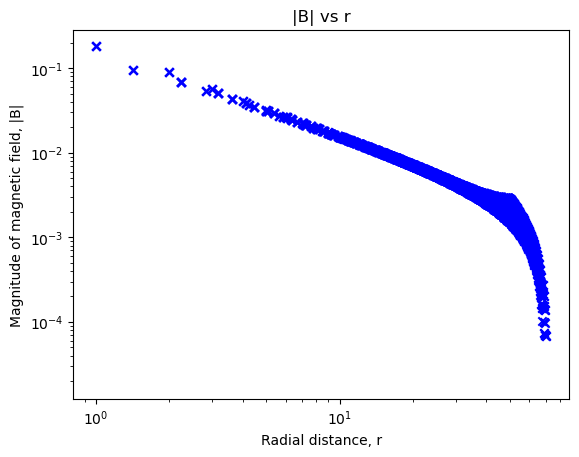

In [287]:
r=df_mag.iloc[500000:510000, 4].to_numpy()
B=df_mag.iloc[500000:510000, 9].to_numpy()

ax=plt.gca() 
ax.scatter(r,B ,c="blue", marker='x')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Radial distance, r')
ax.set_ylabel('Magnitude of magnetic field, |B|')
ax.set_title('|B| vs r')
plt.show()

Applying a linear fit in the region 2<r<12 yields a straight line gradient of **-1.0307**, as shown below. This provides evidence for the expected 1/r behaviour of the magnetic field wrt radial distance from the wire. 

In [264]:
r_lin=[]
B_lin=[]
for n in range(len(r)):
    
    if r[n]>=2 and r[n]<=12:
        r_lin.append(r[n])
        B_lin.append(B[n])
        
m=scipy.stats.linregress(np.log10(r_lin), np.log10(B_lin))[0]
c=scipy.stats.linregress(np.log10(r_lin), np.log10(B_lin))[1]

print(m)

-1.0306529535818356


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>Fitting of magnetic field data</b></p>

<p style='margin-top:1em; text-align:center'>
Gradient of magnetic field log-log plot = <b>-1.0307<b></p>
    
</p>
</p></span>
</div>

We can plot the magnetic vector field in the plane perpendicular to the wire (yz plane). The x component of the magnetic field is zero at all points.

In [265]:
B_field=df_mag.iloc[500000:510000, 7:9].to_numpy()
coord=df_mag.iloc[500000:510000, 2:4].to_numpy()

In [266]:
coord[5050]
B_field[5050]=[0,0] #set B field at origin to zero - this is where the wire is

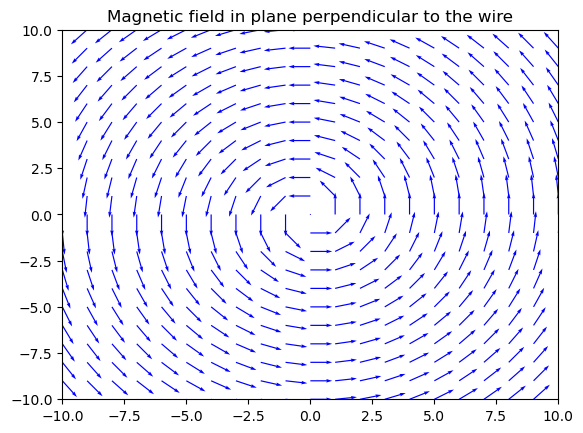

In [27]:
Y = coord[:,0]
Z = coord[:,1]
  
B_y = B_field[:, 0]
B_z = B_field[:, 1]

plt.quiver(Y, Z, B_y, B_z, color='b', units='xy', scale=1)
plt.title('Magnetic field in plane perpendicular to the wire')
  
# x-lim and y-lim
plt.xlim(-10, 10)
plt.ylim(-10, 10)
  
plt.show()